# <font color=red> CMT307 Applied Machine Learning </font>
<a class="anchor" id="main_title"></a>
## Coursework 2 - 2021-2022 Spring semester
### Group 12
<br/>

*Dynamic links to student emails:* <br/>
[Matthew Esposito](mailto:EspositoMD1@cardiff.ac.uk)<br />
[Chuntong Huang](mailto:HuangC31@cardiff.ac.uk)<br />
[Matthew Jepson](mailto:JepsonMW@cardiff.ac.uk)<br />
[Guoyi Jia](mailto:JiaG@cardiff.ac.uk)<br /> 
[Zhicong Tang](mailto:TangZ19@cardiff.ac.uk)<br /> 
[Hekang Zhang](mailto:ZhangH120@cardiff.ac.uk)<br /> 
[Xiaoling Zhu](mailto:ZhuX41@cardiff.ac.uk)<br />
[Jose Mendoza](mailto:mendoza-jimenezjc@cardiff.ac.uk)<br />


<a class="anchor" id="index"></a>
Contents
======
***
*Note: Dynamic links were set up to run on Jupyter Notebook and may not work on Google Colab or Github.*
## [0. Project setup](#0)
<br/>

### [0.1 Import required modules](#0_1)

### [0.2 Source train and test image files](#0_2)
<br/>

### [0.3 Training set](#0_3)
#### [0.3.1 Obtain category names](#0_3_1)
#### [0.3.2 Label all training pictures](#0_3_2)
#### [0.3.3 Create a function to decode all ppm pictures from a given directory into a numpy array](#0_3_3)
#### [0.3.4 Build training dataset](#0_3_4)
#### [0.3.5 Create a summary file for exploratory data analysis](#0_3_5)
<br/>

### [0.4 Test set](#0_4)


<br/>

***
## [1. Descriptive analysis of the dataset + Error analysis](#1)
<br/>

### [1.0. Data load](#1_0)
### [1.1. Exploratory data analysis](#1_1)
<br/>

### [1.2. Data visualization](#1_2)
#### [1.2.1 Average picture area](#1_2_1)
#### [1.2.2 Number of pictures per category](#1_2_2)
#### [1.2.3 Boxplot of picture intensity per category](#1_2_3)
#### [1.2.4 Distribution of pixel intensity per category](#1_2_4)
#### [1.2.5 Visualize 5 random pictures](#1_2_5)

<br/>

***
## [2. Preprocessing + Literature review](#2)
<br/>

### [2.1 Data pre-processing](#2_1)
#### [2.1.1 Resize pictures](#2_1_1)
#### [2.1.2 Shuffle train pictures](#2_1_2)
#### [2.1.3 Split training set into tran and validation set](#2_1_3)
<br/>

### [2.2 Literature review](#2_2)

<br/>

***
## [3. Implementation + results](#3)
<br/>

### [3.1 Model implementation](#3_1)
#### [3.1.1. CNN arquitechture ](#3_1_1)

<br/>

### [3.2 Model training and parameter tuning](#3_2)

### [3.3 Performance review](#3_3)

<br/>


Initial discussion and project scope

***
# 0. Project setup
<a class="anchor" id="0"></a>
#### [Return to index](#main_title)
<br/>



## 0.1 Import required modules
<a class="anchor" id="0_1"></a>
#### [Return to index](#main_title)

In [42]:
# General modules:
import numpy as np
from numpy import save
from numpy import load
import os
import random

# Exploratory data analysis:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [43]:
# Data pre-processing
from sklearn.model_selection import train_test_split
from skimage.transform import resize

In [44]:
# Machine learning module
import tensorflow as tf
import keras

In [45]:
# Task modules:
#from t0_module import x_train, y_train, x_test, y_test, class_names, train_dir, test_dir 


## 0.2 Source train and test image files
<a class="anchor" id="0_2"></a>
#### [Return to index](#main_title)
<br/>
Check if running in Google Colab before determine data directories


In [46]:
import sys

if 'google.colab' in sys.modules:
    
    from google.colab import drive 
    drive.mount('/content/gdrive')

    cmt307g12_dir = "/content/gdrive/My Drive/cmt307-g12/"
    data_dir = "/content/gdrive/My Drive/cmt307-g12/data/" 
    train_dir = "/content/gdrive/My Drive/cmt307-g12/data/train/"
    test_dir = "/content/gdrive/My Drive/cmt307-g12/data/test/"

else:
    cmt307g12_dir = ""
    data_dir = "data/"
    train_dir = "data/train/"
    test_dir = "data/test/"
    

## 0.3 Training set
<a class="anchor" id="0_3"></a>
#### [Return to index](#main_title)

Decode ppm pictures into numpy arrays

### 0.3.1 Obtain category names
<a class="anchor" id="0_3_1"></a>
#### [Return to index](#main_title)


In [47]:
class_names = [
"Max Speed 20 km/h",
"Max Speed 30 km/h",
"Max Speed 50 km/h",
"Max Speed 60 km/h",
"Max Speed 70 km/h",
"Max Speed 80 km/h",
"End of 80 km/h zone",
"Max Speed 100 km/h",
"Max Speed 120 km/h",
"No passing",
"No passing for vehicles over 3.5 tonnes",
"Priority",
"Priority road",
"Yield",
"Stop",
"Road closed",
"Vehicles over 3.5 tonnes prohibited",
"Do not enter",
"General danger",
"Left curve",
"Right curve",
"Double curve",
"Uneven road surface",
"Slippery when wet or dirty",
"Road narrows",
"Roadworks",
"Traffic signals ahead",
"Pedestrians",
"Watch for children",
"Bicycle crossing",
"Ice - snow",
"Wild animal crossing",
"End of all restrictions",
"Turn right ahead",
"Turn left ahead",
"Ahead only",
"Ahead or turn right only",
"Ahead or turn left only",
"Pass by on right",
"Pass by on left",
"Roundabout",
"End of no passing zone",
"End of no passing zone for trucks"
]

### 0.3.2 Label all training pictures
<a class="anchor" id="0_3_2"></a>
#### [Return to index](#main_title)


In [48]:
y_train = []
y_train_names = []

for folder in os.listdir(train_dir):
    
    pictures = [pic for pic in os.listdir(train_dir + "/" + folder) if pic.split(".")[-1] == "ppm" ] # filter out non-ppm files
    
    for picture in pictures:
        y_train_names.append(class_names[int(folder)]) # translates ClassId figure into label name, for example class_names[int(000000)] = 'Max Speed 20 km/h'
        y_train.append(int(folder))
        
y_train = np.array(y_train)

### 0.3.3 Create a function to decode all ppm pictures from a given directory into a numpy array
<a class="anchor" id="0_3_3"></a>
#### [Return to index](#main_title)


In [49]:
#Create a filtered list of .ppm files, then call plt.imread on the resulting list.

def PpmToNumpy(directory):
    
    '''
    Given a host directory containing ppm pictures, converts the pictures into a numpy array, returning an array with the whole list of pictures.

    Params:
    String containing a directory address.

    Returns:
    numpy array whose items are decoded ppm pictures (np.array)

    '''

    files = os.listdir(directory)
    files = [file for file in files if file.split(".")[1] == "ppm"] # to ensure only ppm images are called
    
    return np.array([plt.imread(directory + file) for file in files], dtype=object)
                       

### 0.3.4 Build training dataset
<a class="anchor" id="0_3_4"></a>
#### [Return to index](#main_title)


Create a function to save a numpy array externally:

In [50]:
def SaveNumpy(filename, directory, obj):
  save(directory + filename + ".npy", obj)
  return None

def LoadNumpy(filename, directory):
  return load(directory + filename + ".npy")

Look for checkpoints before attempting to decode **train** images:

In [51]:
if "all_train_images.npy" in os.listdir(data_dir + "numpy/"):
  x_train = LoadNumpy("all_train_images.npy", data_dir + "numpy/")

else:

  all_images = [ PpmToNumpy(train_dir + folder + "/") for folder in os.listdir(train_dir)]
  x_train = np.concatenate(all_images, axis=0, out=None, dtype=None, casting="same_kind")

  SaveNumpy("all_train_images", data_dir + "numpy/", x_train)

### 0.3.5 Create a summary file for exploratory data analysis
<a class="anchor" id="0_3_5"></a>
#### [Return to index](#main_title)


In [52]:
# Train summary file:

if "train_summary_df.csv" not in os.listdir(data_dir):

  train_summary = dict.fromkeys(["Width", "Height", "ClassId"], [])
  widths = []
  heights = []

  for picture in x_train:
      widths.append(picture.shape[0])
      heights.append(picture.shape[1])

  train_summary["Width"] = widths
  train_summary["Height"] = heights
  train_summary["ClassId"] = y_train
  
  train_summary_df = pd.DataFrame( train_summary)
  train_summary_df.to_csv(data_dir + "train_summary.csv", index = False)
  train_summary_df.head(5)

## 0.4 Test set
<a class="anchor" id="0_4"></a>
#### [Return to index](#main_title)

In [53]:
test_meta = pd.read_csv(data_dir + "Test.csv")
test_meta.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [54]:
y_test =  np.array(test_meta["ClassId"])
y_test_names = np.array(test_meta["ClassId"].apply(lambda x: class_names[x]))

y_test[:10]

array([16,  1, 38, 33, 11, 38, 18, 12, 25, 35], dtype=int64)

Look for checkpoints before attempting to decode **test** images:

In [55]:
if "all_test_images.npy" in os.listdir(data_dir + "numpy/"):
  x_test = LoadNumpy("all_test_images.npy", data_dir + "numpy/")

else:
  x_test = PpmToNumpy(test_dir)

  SaveNumpy("all_test_images", data_dir + "numpy/", x_test)

***
# 1. Descriptive analysis of the dataset + error analysis 
<a class="anchor" id="1"></a>
#### [Return to index](#main_title)
<br/>

The scope of this section is to get a general idea of the whole dataset.
We will start creating a histogram to see how many pictures are available for each category.

## 1.0 Data load 
<a class="anchor" id="1_0"></a>
#### [Return to index](#main_title)
On step 0.3.5 we built a summary dataframe with the training set of pictures: **train_summary.csv**

In [56]:
#train_df = pd.read_csv("data/Train.csv")
train_df = pd.read_csv(data_dir + "train_summary.csv")

test_df = pd.read_csv(data_dir + "Test.csv")

train_df.head()

,Width,Height,ClassId
0,30,29,0
1,30,30,0
2,30,30,0
3,31,31,0
4,32,30,0


In [57]:
train_df['Area'] = train_df.Height * train_df.Width

train_df.head()

,Width,Height,ClassId,Area
0,30,29,0,870
1,30,30,0,900
2,30,30,0,900
3,31,31,0,961
4,32,30,0,960


## 1.1 Exploratory data analysis 
<a class="anchor" id="1_1"></a>
#### [Return to index](#main_title)
<br/>

##### Create a dataframe with summary data per **category** - *train_df_cat*

In [58]:
train_df_cat = train_df.groupby('ClassId', as_index=False).mean().sort_values(by='Area', ascending=True)

print(train_df_cat.head())

    ClassId      Width     Height         Area
17       17  40.273874  38.010811  1677.474775
6         6  42.126190  40.404762  1881.604762
42       42  41.291667  41.145833  1885.904167
32       32  41.425000  41.004167  1968.908333
5         5  42.823656  42.515054  2083.274194


## 1.2 Data visualization 
<a class="anchor" id="1_2"></a>
#### [Return to index](#main_title)

### 1.2.1 Average picture area
<a class="anchor" id="1_2_1"></a>
##### [Return to index](#main_title)
<br/>

Create a **barplot** to explore average picture area:

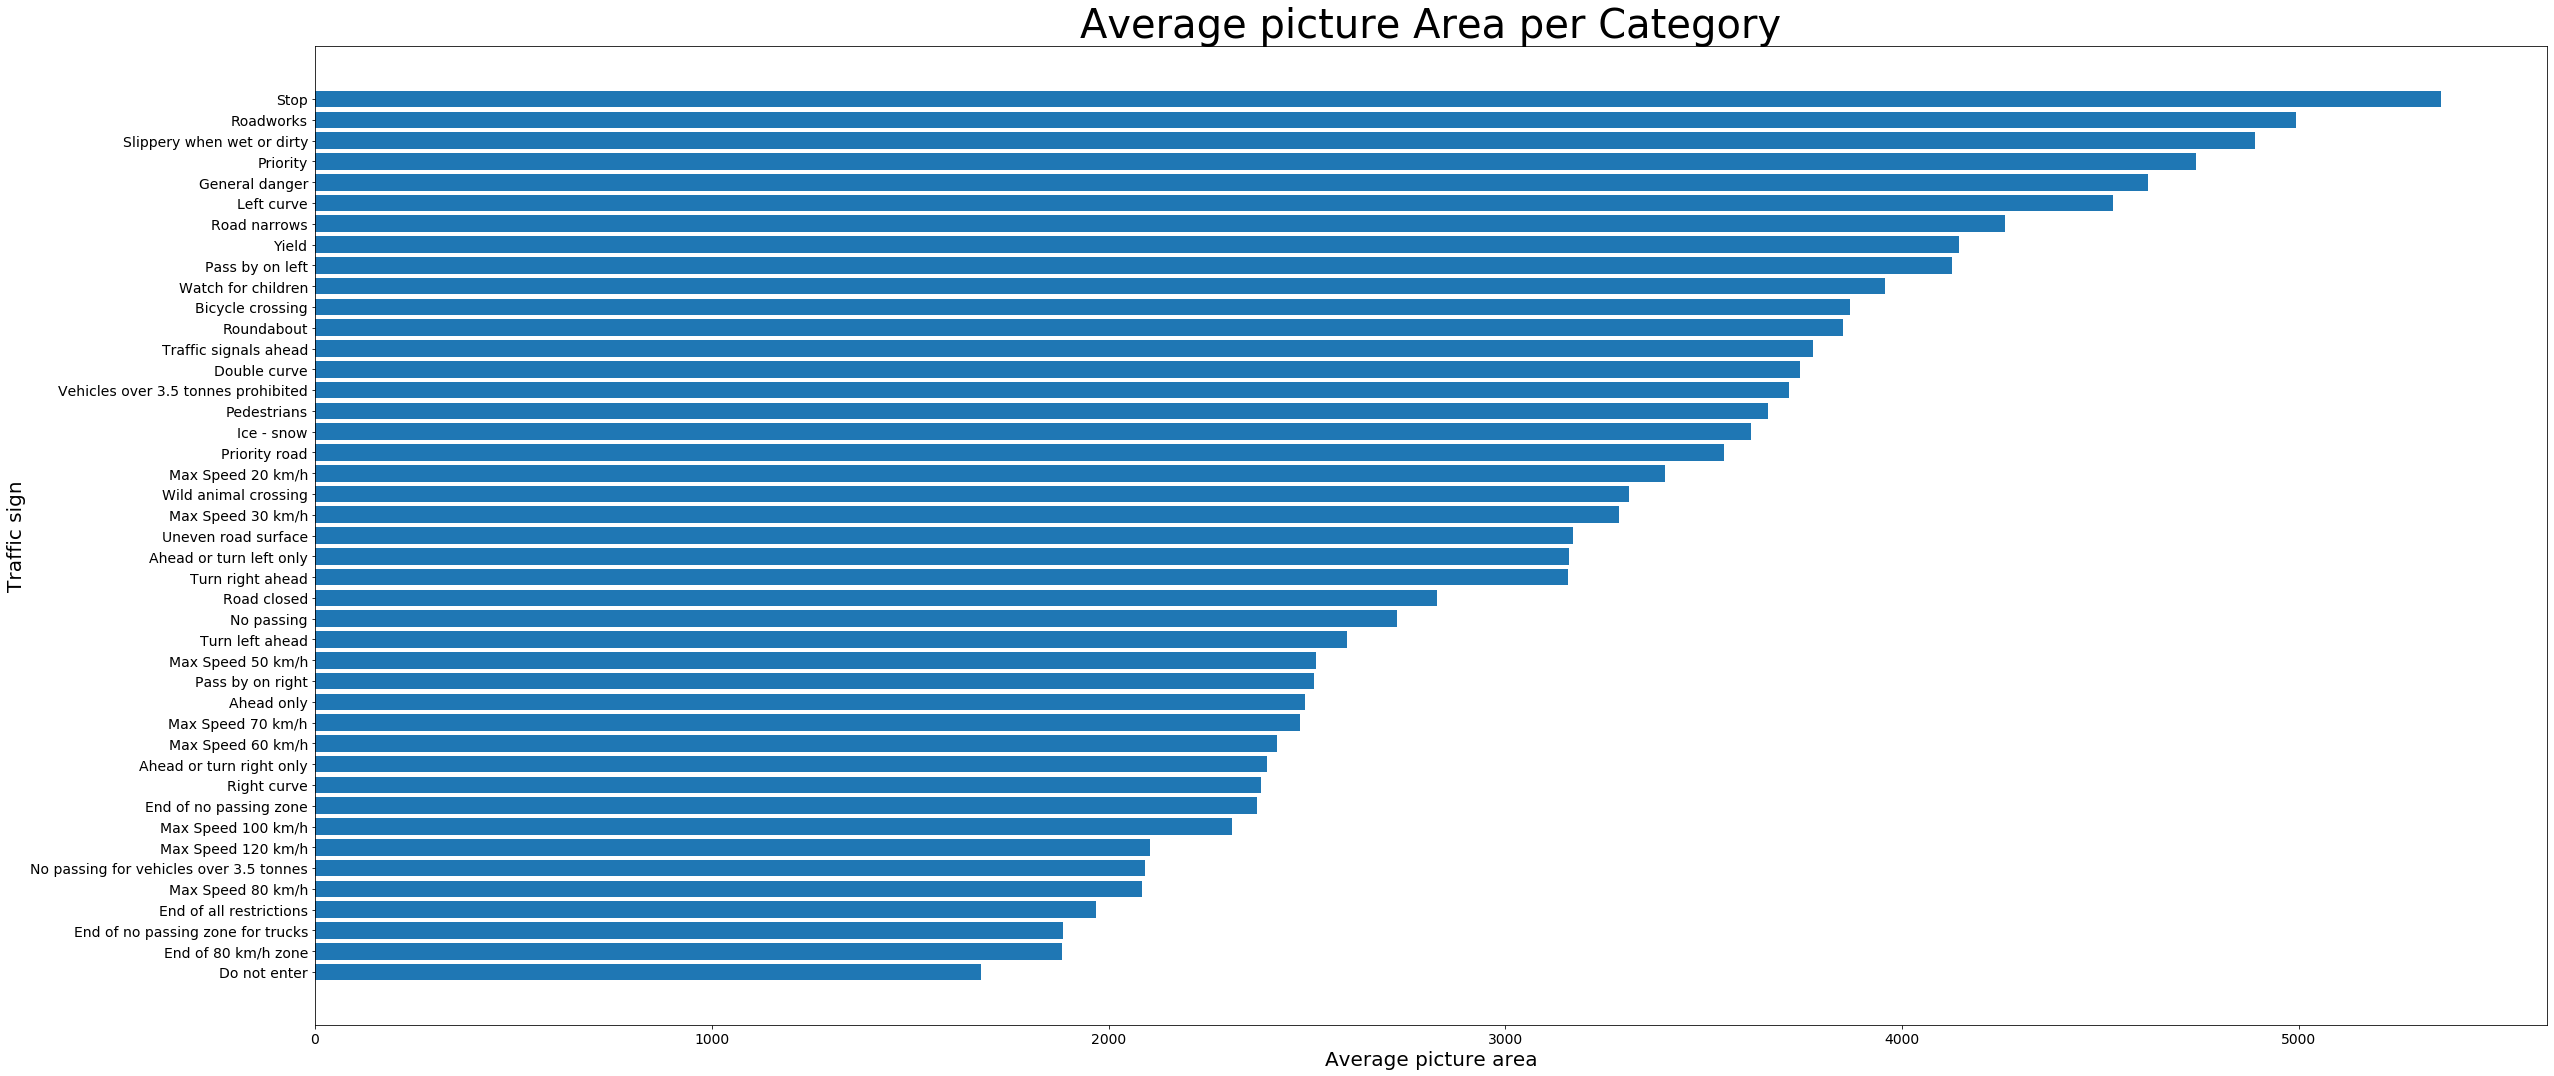

In [59]:
fig = plt.figure(figsize=(40, 18))
ax=plt.subplot()

plt.barh(range(len(train_df_cat)), train_df_cat['Area'])

plt.title('Average picture Area per Category', fontsize=40)
plt.xlabel('Average picture area', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

labels = [ class_names[i] for i in train_df_cat.index ]
ax.set_yticks(range(len(train_df_cat)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig(cmt307g12_dir + "report/images/area_barplot.png")

plt.show()


### 1.2.2 Number of pictures per category 
<a class="anchor" id="1_2_2"></a>
#### [Return to index](#main_title)
<br/>

Create a **barplot** to explore number of pictures per category:

In [60]:
train_counts = train_df.ClassId.value_counts().sort_values(ascending = True)

train_counts[:10]

0     210
19    210
37    210
27    240
41    240
42    240
32    240
29    270
24    270
39    300
Name: ClassId, dtype: int64

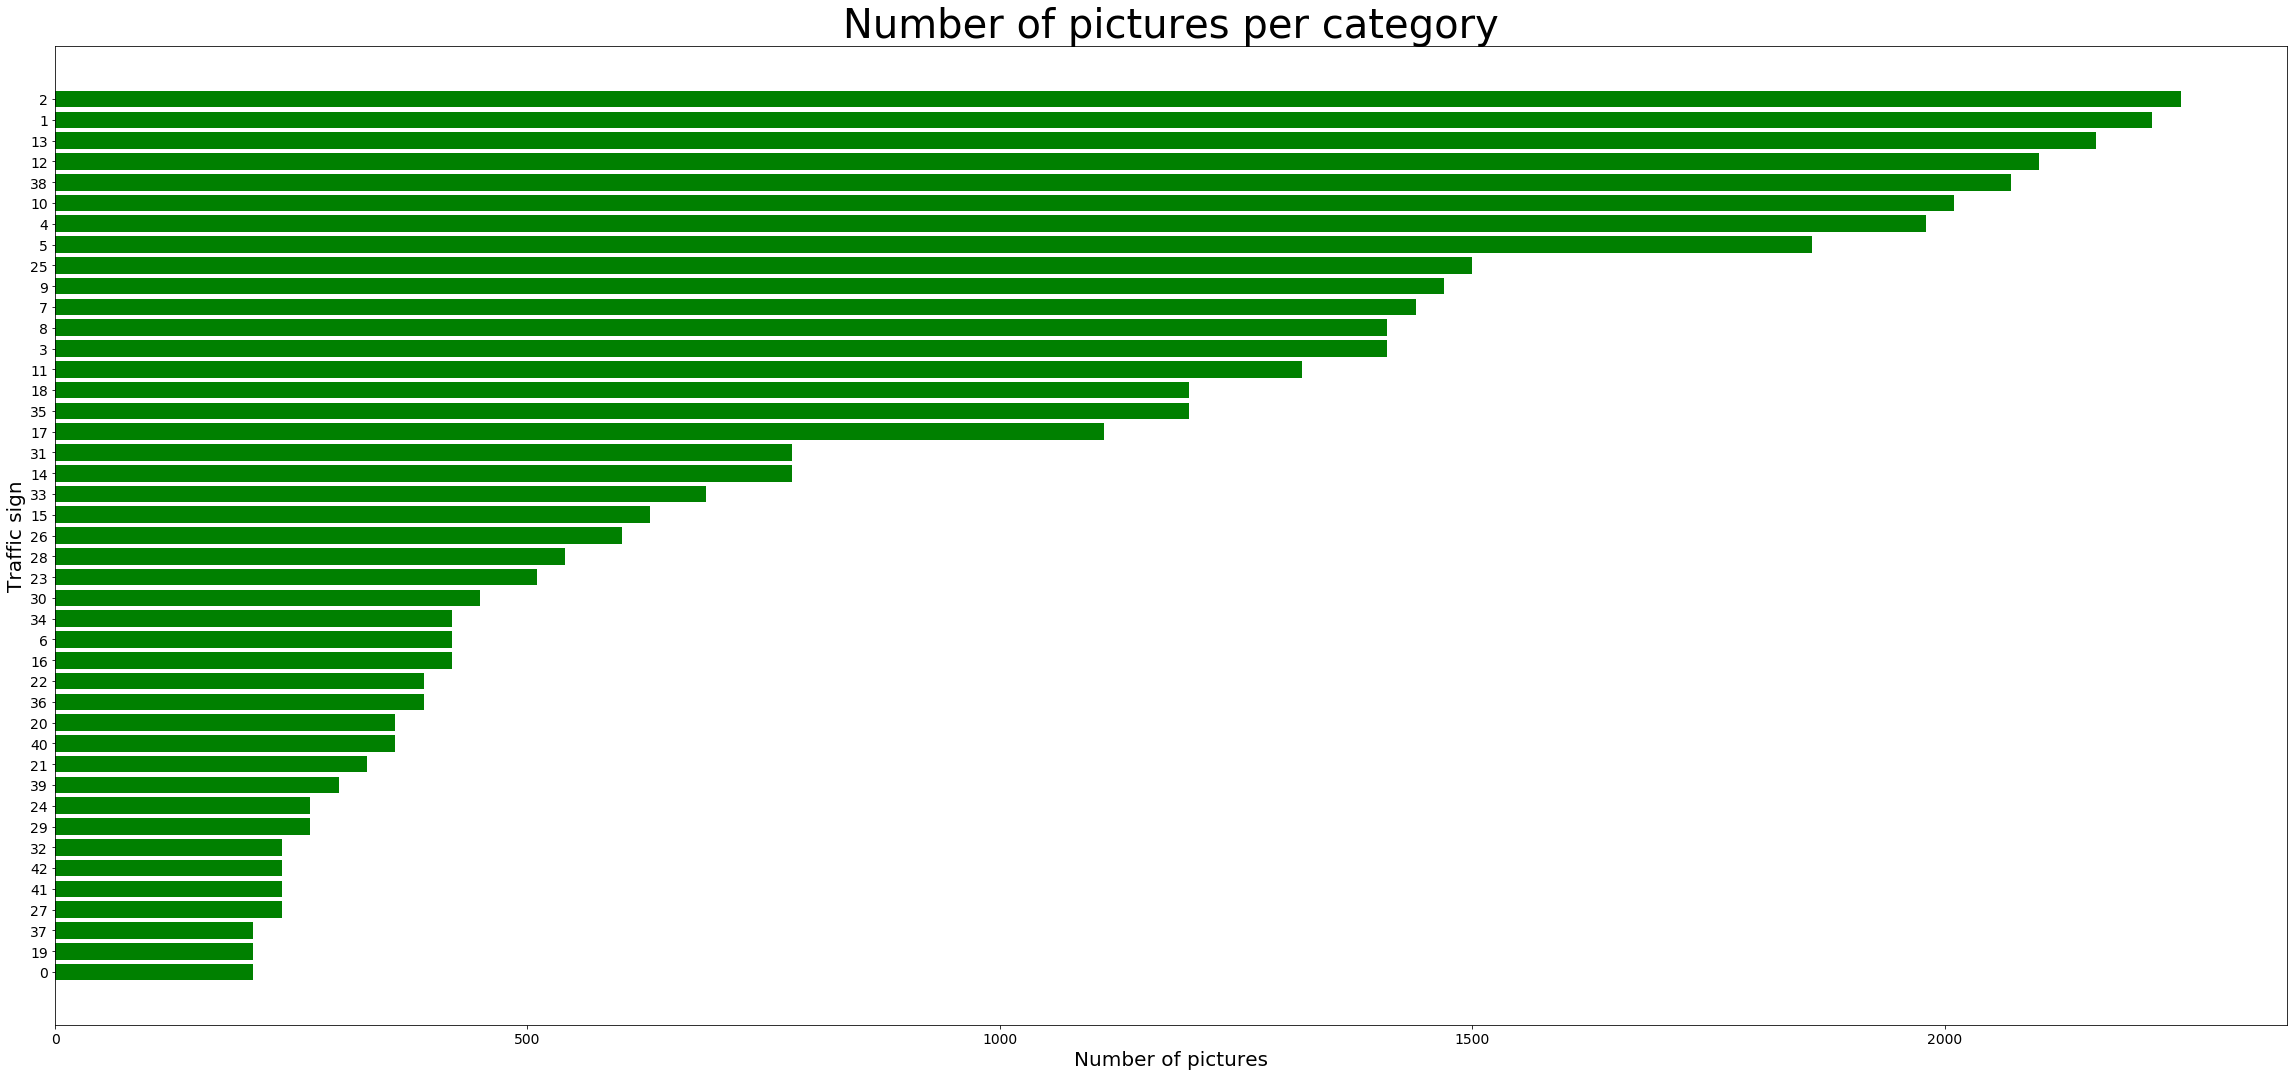

In [61]:
fig = plt.figure(figsize=(40, 18))
ax=plt.subplot()

plt.barh(range(len(train_counts)), train_counts.values, color = 'green')
plt.title('Number of pictures per category', fontsize=40)
plt.xlabel('Number of pictures', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

#labels = [ class_names[i] for i in train_counts.index ]
labels = train_counts.index

ax.set_yticks(range(len(train_counts)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig(cmt307g12_dir + "report/images/num_pictures_barplot.png")

plt.show()


### 1.2.3 Boxplot of picture intensity per category 
<a class="anchor" id="1_2_3"></a>
#### [Return to index](#main_title)
<br/>

Box plot of picture's individual average intensity per category:

#### Create a dataframe from decoded train pictures: 
##### *x_train + y_train -> df_pixels*

In [62]:
pic_means = [ picture.mean() for picture in x_train]

df_pixels = pd.DataFrame( list(zip(pic_means, y_train_names)), columns=['Picture avg', 'Category']  )


In [63]:
df_pixels.head(5)

,Picture avg,Category
0,128.588506,Max Speed 20 km/h
1,129.371111,Max Speed 20 km/h
2,127.922593,Max Speed 20 km/h
3,126.164759,Max Speed 20 km/h
4,130.678125,Max Speed 20 km/h


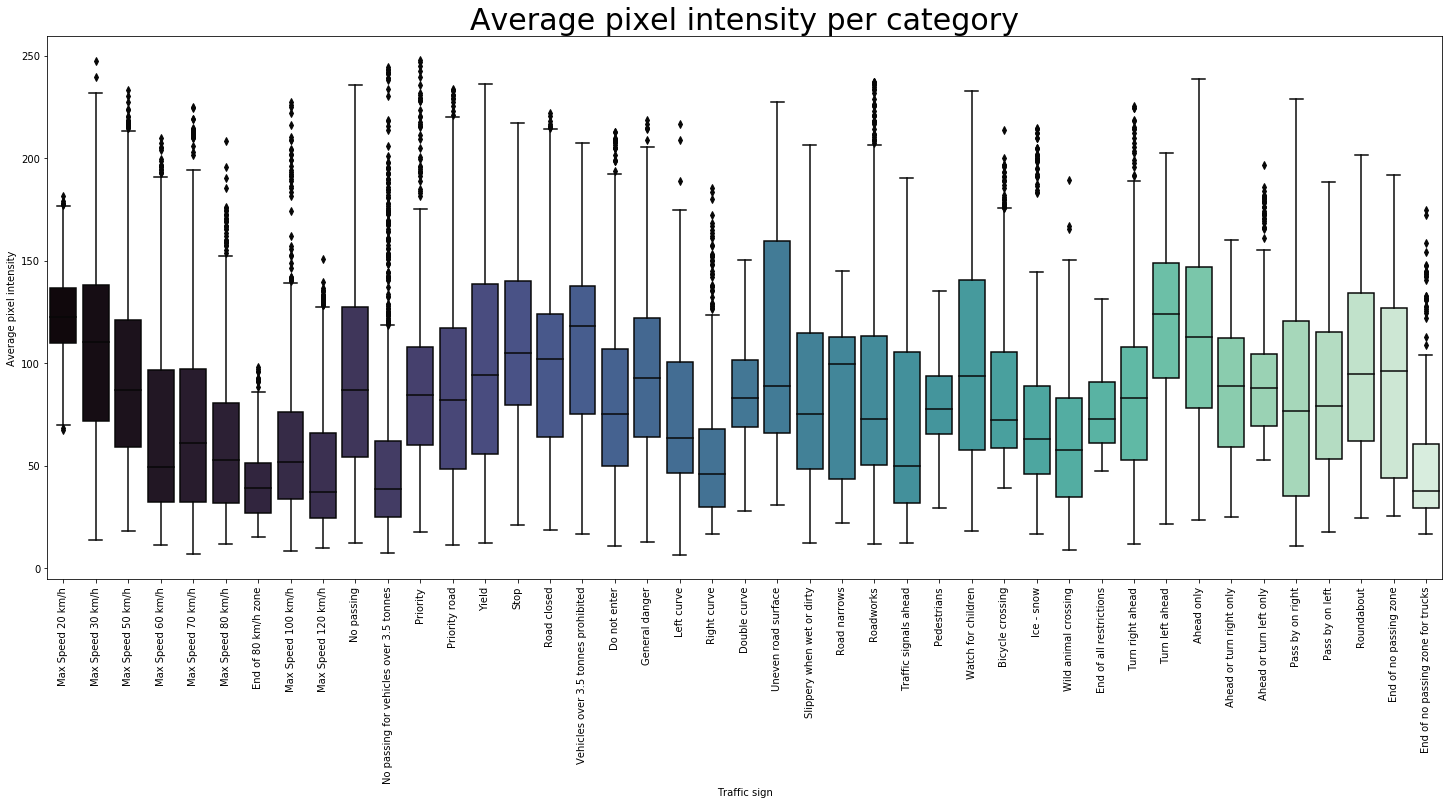

In [64]:
# box plot showing relationship between education and compenstation
fig = plt.figure(figsize=(25, 10))
ax=plt.subplot()

sns.boxplot(x = "Category", y = "Picture avg", palette = "mako", data = df_pixels)
plt.title('Average pixel intensity per category', fontsize=30)
plt.xlabel('Traffic sign')
plt.ylabel('Average pixel intensity')

#labels = [ class_names[i] for i in train_counts.index ]
#ax.set_xticks(range(len(train_counts)))
#ax.set_xticklabels(labels, rotation = 90)

plt.xticks(rotation = 90)

plt.savefig(cmt307g12_dir + "report/images/pixel_intensity_barplot.png")

plt.show()

### 1.2.4 Distribution of pixel intensity per category 
<a class="anchor" id="1_2"></a>
#### [Return to index](#main_title)
<br/>

Distribution of picture's average intensity per category

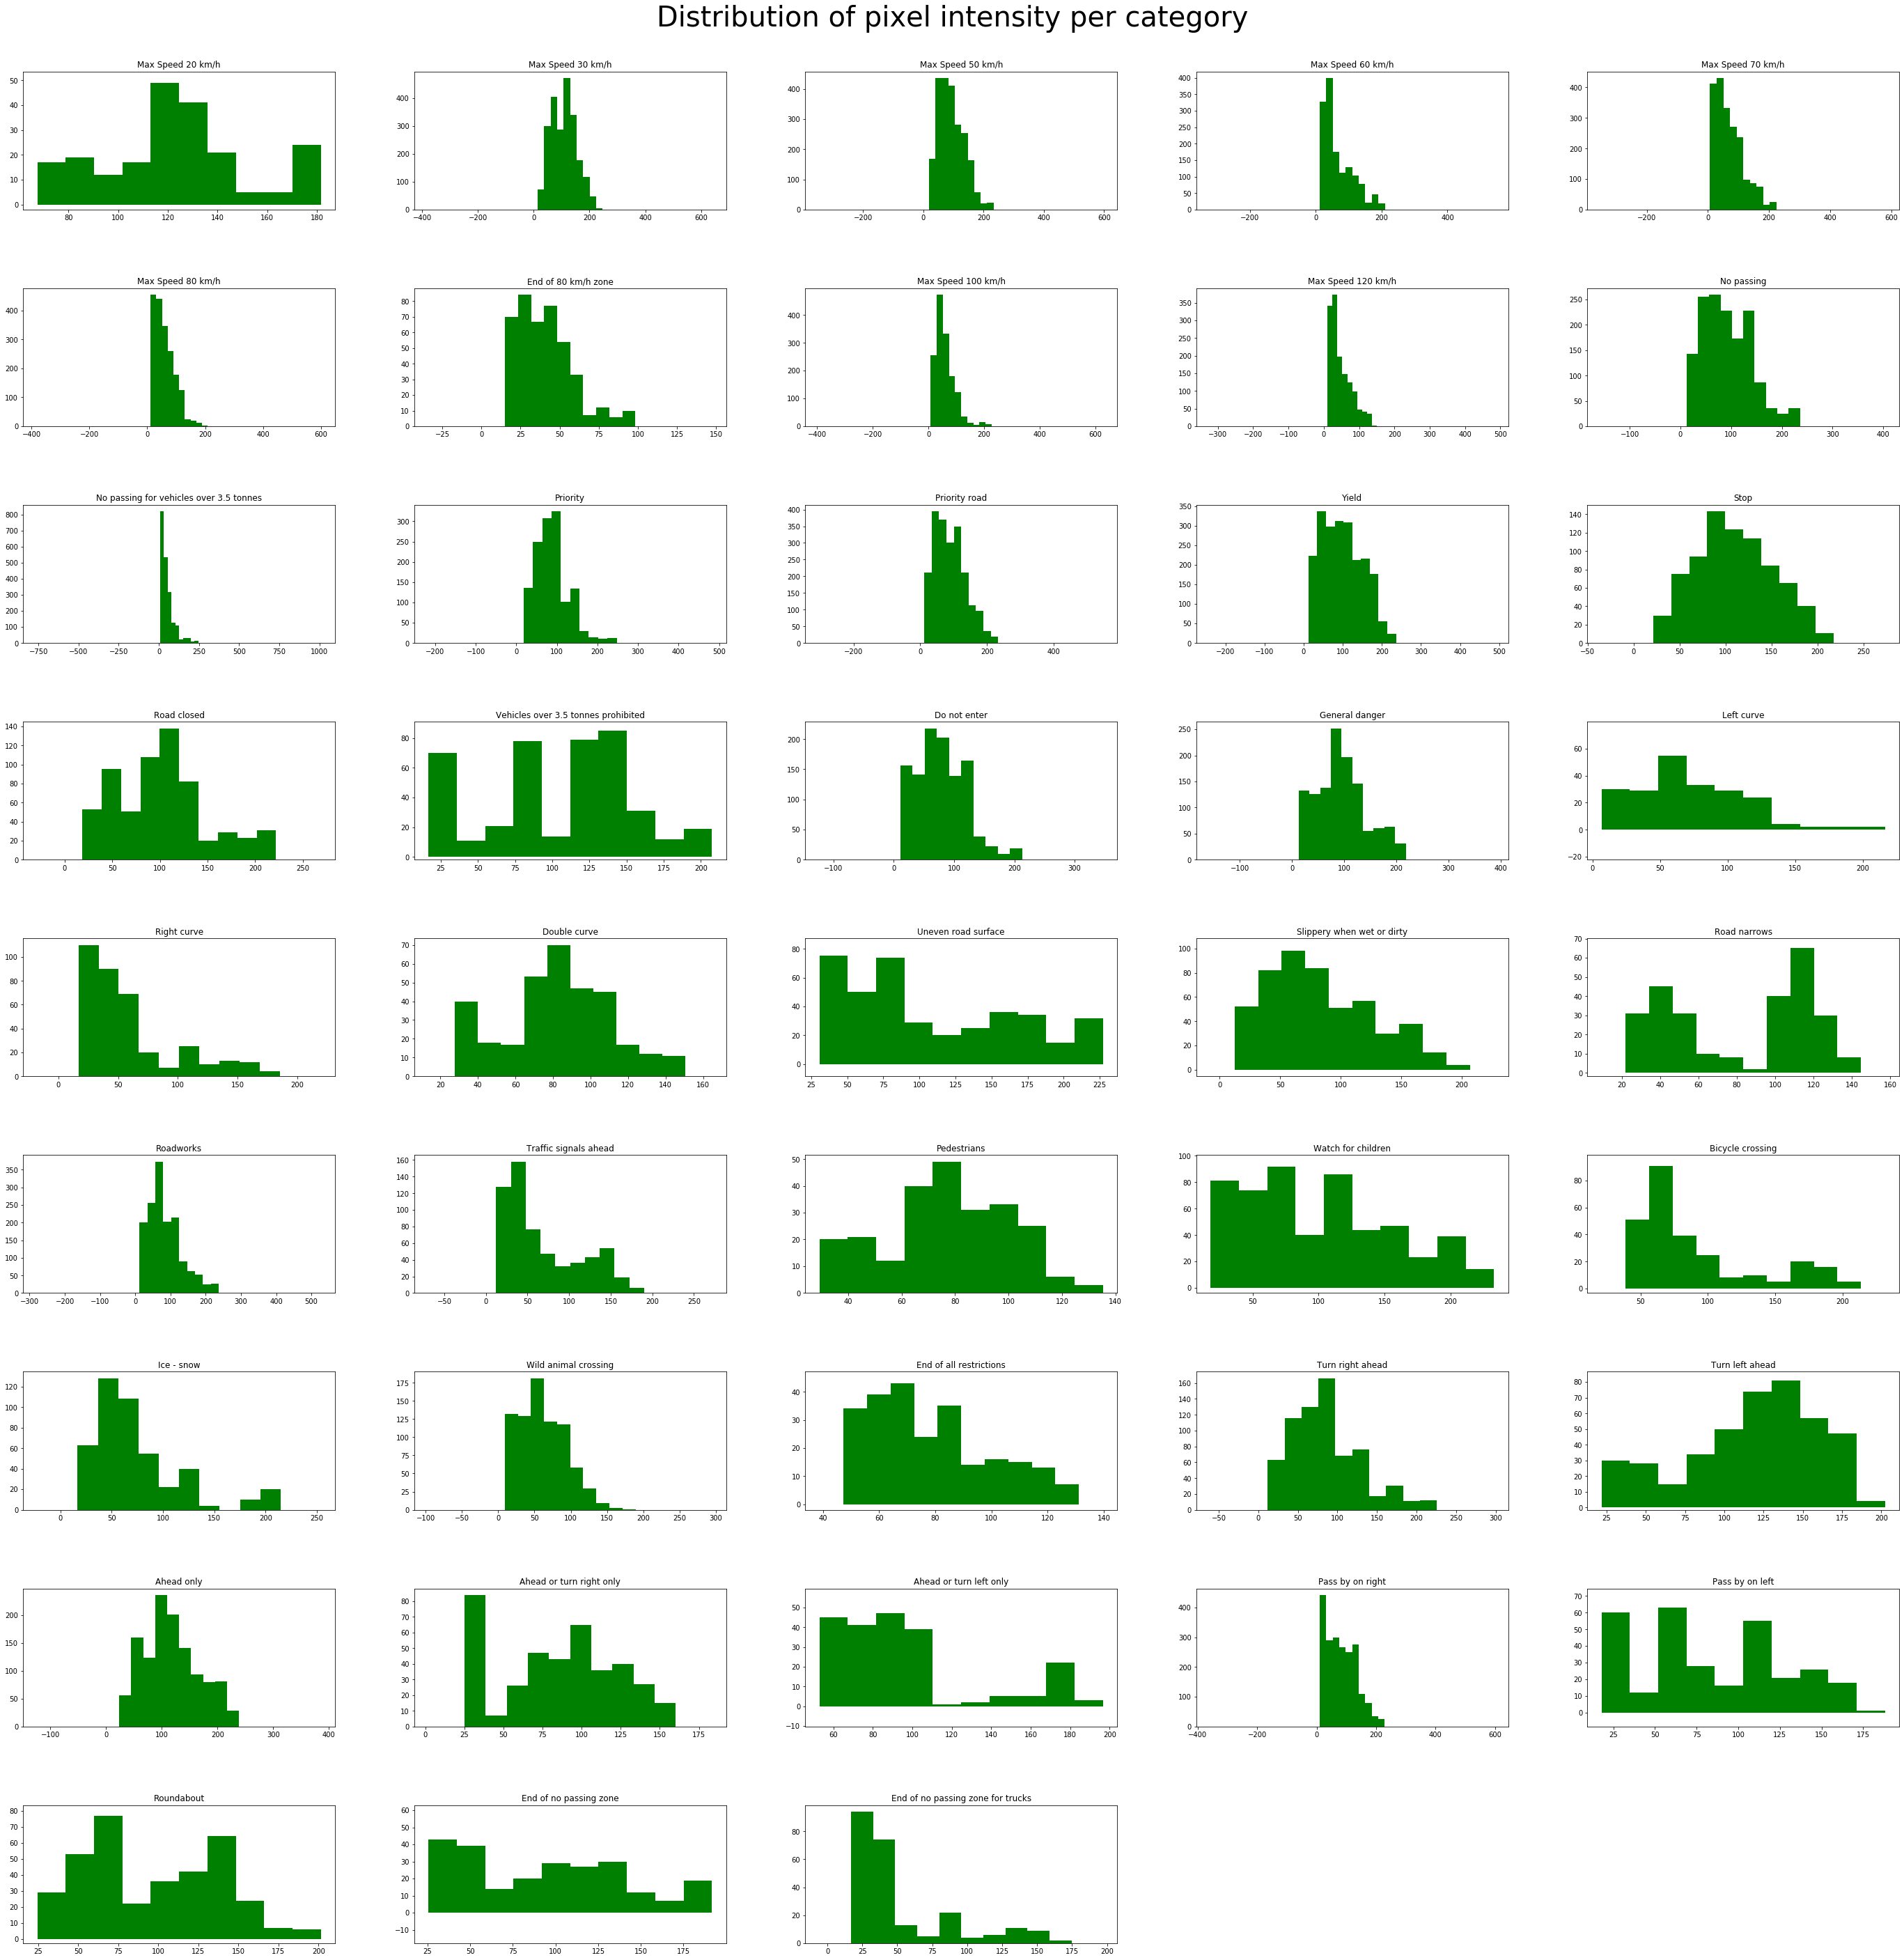

In [65]:
# Create the main figure:
fig = plt.figure(figsize=(25,25))

# Create a collection of axes names for the following subplot:
axes = [category + "_ax" for category in class_names]

for i in range(len(class_names)) :
    
    axes[i] = fig.add_subplot(9, 5 , i+1)
        
    fig.set_figheight(40)
    fig.set_figwidth(40)
    
    category = class_names[i]
    values = df_pixels[df_pixels.Category == category]["Picture avg"]
    
    axes[i].hist([values], bins = 10, facecolor = 'green')
    #sns.histplot(values)
    
    axes[i].axis('equal')  
    axes[i].set_title(class_names[i])

    
fig.tight_layout(pad=8.0)
fig.suptitle("Distribution of pixel intensity per category", fontsize=40, y= 1.0)

plt.savefig(cmt307g12_dir + "report/images/pixel_intensity_distribution.png")

plt.show()     

### 1.2.5 Visualize 5 random pictures
<a class="anchor" id="1_2"></a>
#### [Return to index](#main_title)
<br/>

Inspect 25 random pictures from the Test directory

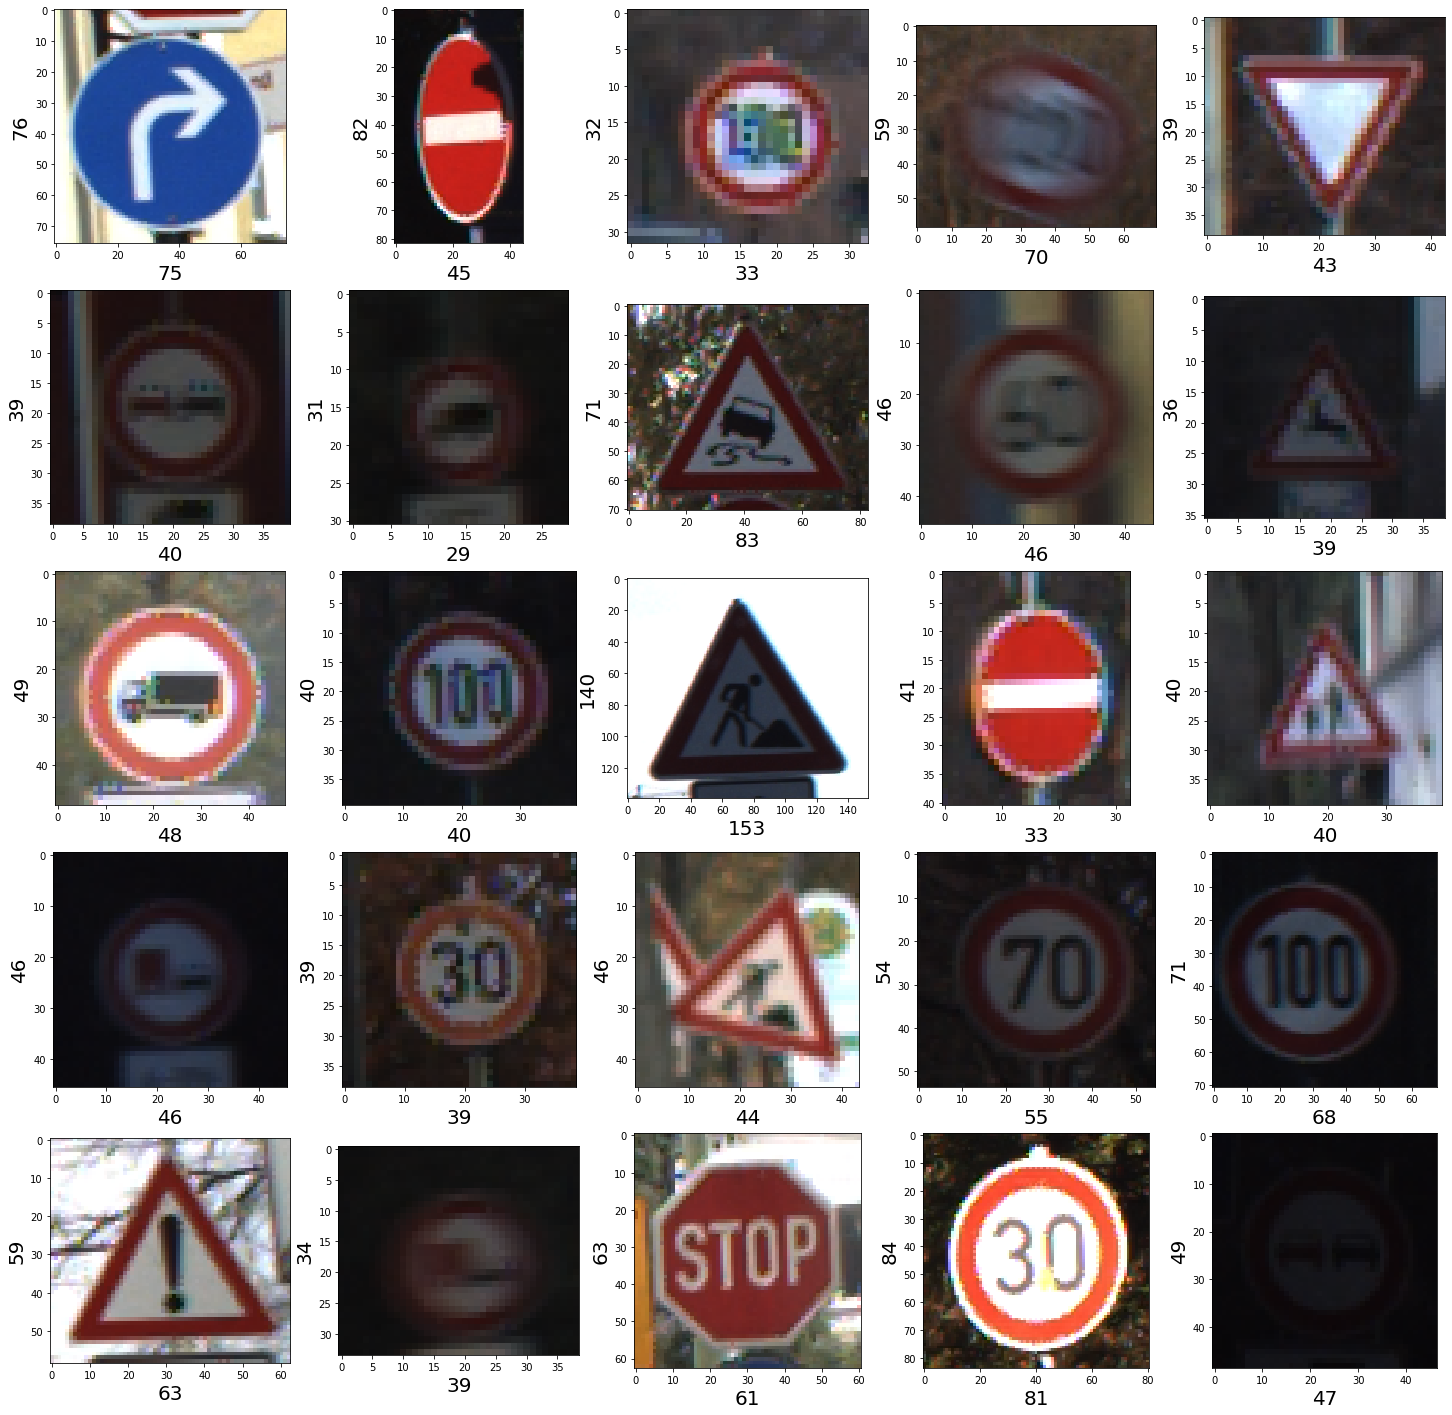

In [66]:
imgs = os.listdir(test_dir)
from matplotlib.image import imread

plt.figure(figsize=(25,25))

for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_dir + random.choice(imgs)
    rand_img = imread(random_img_path)
    
    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image
    
plt.savefig(cmt307g12_dir + "report/images/random_pictures.png")
    

***
# 2. Preprocessing + Literature review 
<a class="anchor" id="2"></a>
#### [Return to index](#main_title)

## 2.1 Dataset preprocessing 
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

### 2.1.1 Resize pictures 
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

In [67]:
# Resize TEST pictures (NOT TRAIN) for a trial:
img_width = 30
img_height = 30

x_test_resized = np.array([resize(image, (img_width, img_height)) for image in x_test])

Trial cell to test picture loading:

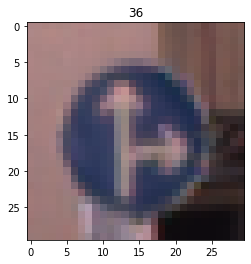

In [68]:
index = 3469

plt.figure()
plt.imshow(x_test_resized[index, ], cmap = 'gray')
plt.title(y_test[index])
plt.show()

In [69]:
# Normalize data 0 -- 1
x_train = x_train/255
x_test = x_test/255

# Target picture features:
img_width = 30
img_height = 30
channels = 3

In [70]:
# Resize whole train image dataset:
x_train_resized = np.array([ resize(image, (img_width, img_height)) for image in x_train])

### 2.1.2 Shuffle train pictures
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

In [71]:
# Shuffle train pictures:

shuffle_indexes = np.arange(x_train_resized.shape[0])
np.random.shuffle(shuffle_indexes)

x_train_resized = x_train_resized[shuffle_indexes]
y_train = y_train[shuffle_indexes]


### 2.1.3 Split training set into tran and validation set
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

In [72]:
# Split the train data into train and validation set:

X_train, X_val, Y_train, Y_val = train_test_split(x_train_resized, y_train, test_size=0.3, random_state=42, shuffle=True)

#X_train = X_train/255 
#X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", Y_train.shape)
print("y_valid.shape", Y_val.shape)


X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


Trial cell to check picture loading:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


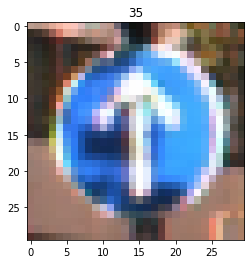

In [73]:
index = 14673

plt.figure()
plt.imshow(X_train[index, ], cmap = 'gray')
plt.title(Y_train[index])
plt.show()

In [74]:
# One hot encoding the labels:

Y_train = keras.utils.to_categorical(Y_train, len(class_names))
Y_val = keras.utils.to_categorical(Y_val, len(class_names))

print(Y_train.shape)
print(Y_val.shape)


(27446, 43)
(11763, 43)


## 2.2 Literature Review 
<a class="anchor" id="2_2"></a>
#### [Return to index](#main_title)

<br/>
<br/>
Data review and justification for choosing the model below will be detailed in the Markdown report.
<br/>
<br/>

***
# 3. Implementation + results 
<a class="anchor" id="3"></a>
#### [Return to index](#main_title)

## 3.1 Model implementation 
<a class="anchor" id="3_1"></a>
#### [Return to index](#main_title)

In [75]:
# Create a CNN model:

model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(img_height, img_width, channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])



### 3.1.1 CNN Architecture  
<a class="anchor" id="3_1_1"></a>
#### [Return to index](#main_title)

In [76]:
# Discuss CNN model and add more layers if neccesary:






## 3.2 Model training and parameter tuning
<a class="anchor" id="3_2"></a>
#### [Return to index](#main_title)

In [77]:
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [78]:
# Train the model:

#history = model.fit(aug.flow(X_train, Y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

class_codes = dict(zip(class_names, range(len(class_names))))

#Y_train_codes = [ class_codes[entry] for entry in Y_train]
#Y_val_codes = [ class_codes[entry] for entry in Y_val]
Y_test = y_test
#Y_test_codes = [ class_codes[entry] for entry in y_test]

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)        

In [80]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])

In [81]:
history = model.fit(X_train, np.array(Y_train), epochs = 30, validation_data=(X_val, np.array(Y_val)))

ValueError: Error when checking target: expected dense_2 to have shape (1,) but got array with shape (43,)

In [ ]:
Y_test

In [ ]:
model.evaluate(x_test, np.array(Y_test))

In [ ]:
history.history

# Save model

In [ ]:
# Save model
from datetime import datetime
now = datetime.now().time() # time object

save_path = cmt307g12_dir + "saved_models/" + str(now).replace(".","-").replace(":","-")
model.save(save_path)

# Load model

In [ ]:
new_model = tf.keras.models.load_model('saved_models/00-24-37-912214')

## 3.3 Performance review
<a class="anchor" id="3_3"></a>
#### [Return to index](#main_title)

In [ ]:
# Plot accuracy vs loss performance and discuss the need of data augmentation:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
